In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [38]:
df  = pd.read_csv('creditcard.csv')

In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df.shape

(284807, 31)

This dataset we have here is a imbalenced dataset which means the ratio between fraude and non fraud cases is very vast

An imbalanced dataset is a dataset where the classes are not evenly distributed. This means that there are significantly more data points in one class than in the others

This may cause biased output whwn we train our model with this dataset

### There are methods to solve this imbalenced problem

Such as,

1. Oversampling  the minority class.
2. Undersampleing the majority class.

    ect.


### The most common metrics used for imbalenced datasets

1. F1 score
2. Precision
3. Recall
4. AUC score (AUC ROC)
5. Average precision score (AP)
6. G-Mean


When developing a machine learning model, it is important to track multiple metrics to get a complete picture of the model's performance. This is because different metrics highlight different aspects of model performance

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now we are dealing with the data of coustomers so as we can see there are columns name from v1 to v28 , These are the result of PCA Transformation ,As we cannot get the original values and background info due to Confidentiality issues

The only columns which are not transformed are:

1. Amount (shows the transaction amount)
2. Time   (shows no of sec the transactions occured)
3. Class  (shows weather the tranation is fraud(1) or Legit(0))

#### Checking weather Data is  Imbalence or not

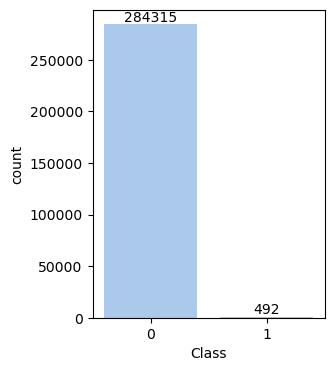

In [43]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [44]:
labels=["Genuine","Fraud"]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels,title="Fraud vs Genuine")
fig.show()

As we can see that the percentage of fraud transctions very minute compared to the Genunie

99.8% Accuracy score before implementing any model which means that a blind guess (bet on Genuine) would give us accuracy of 99.8% so even After training  it may give us wrong predictions

## Data Preprocessing

--> We know that time does not compenseate anyhing to the fraud because fraud can take point of the day so we are dropping the time column

In [45]:
df = df.drop('Time', axis=1)

In [46]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now we will drop the duplicae values

In [47]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


#### Checking for Outliers

In [48]:
numeric_columns = (list(df.loc[:, 'V1':'Amount'])) 
##This is to select all the columns from v1 to amount and making
## a list of them 
                                                    

We will look for the outliers useing boxplot

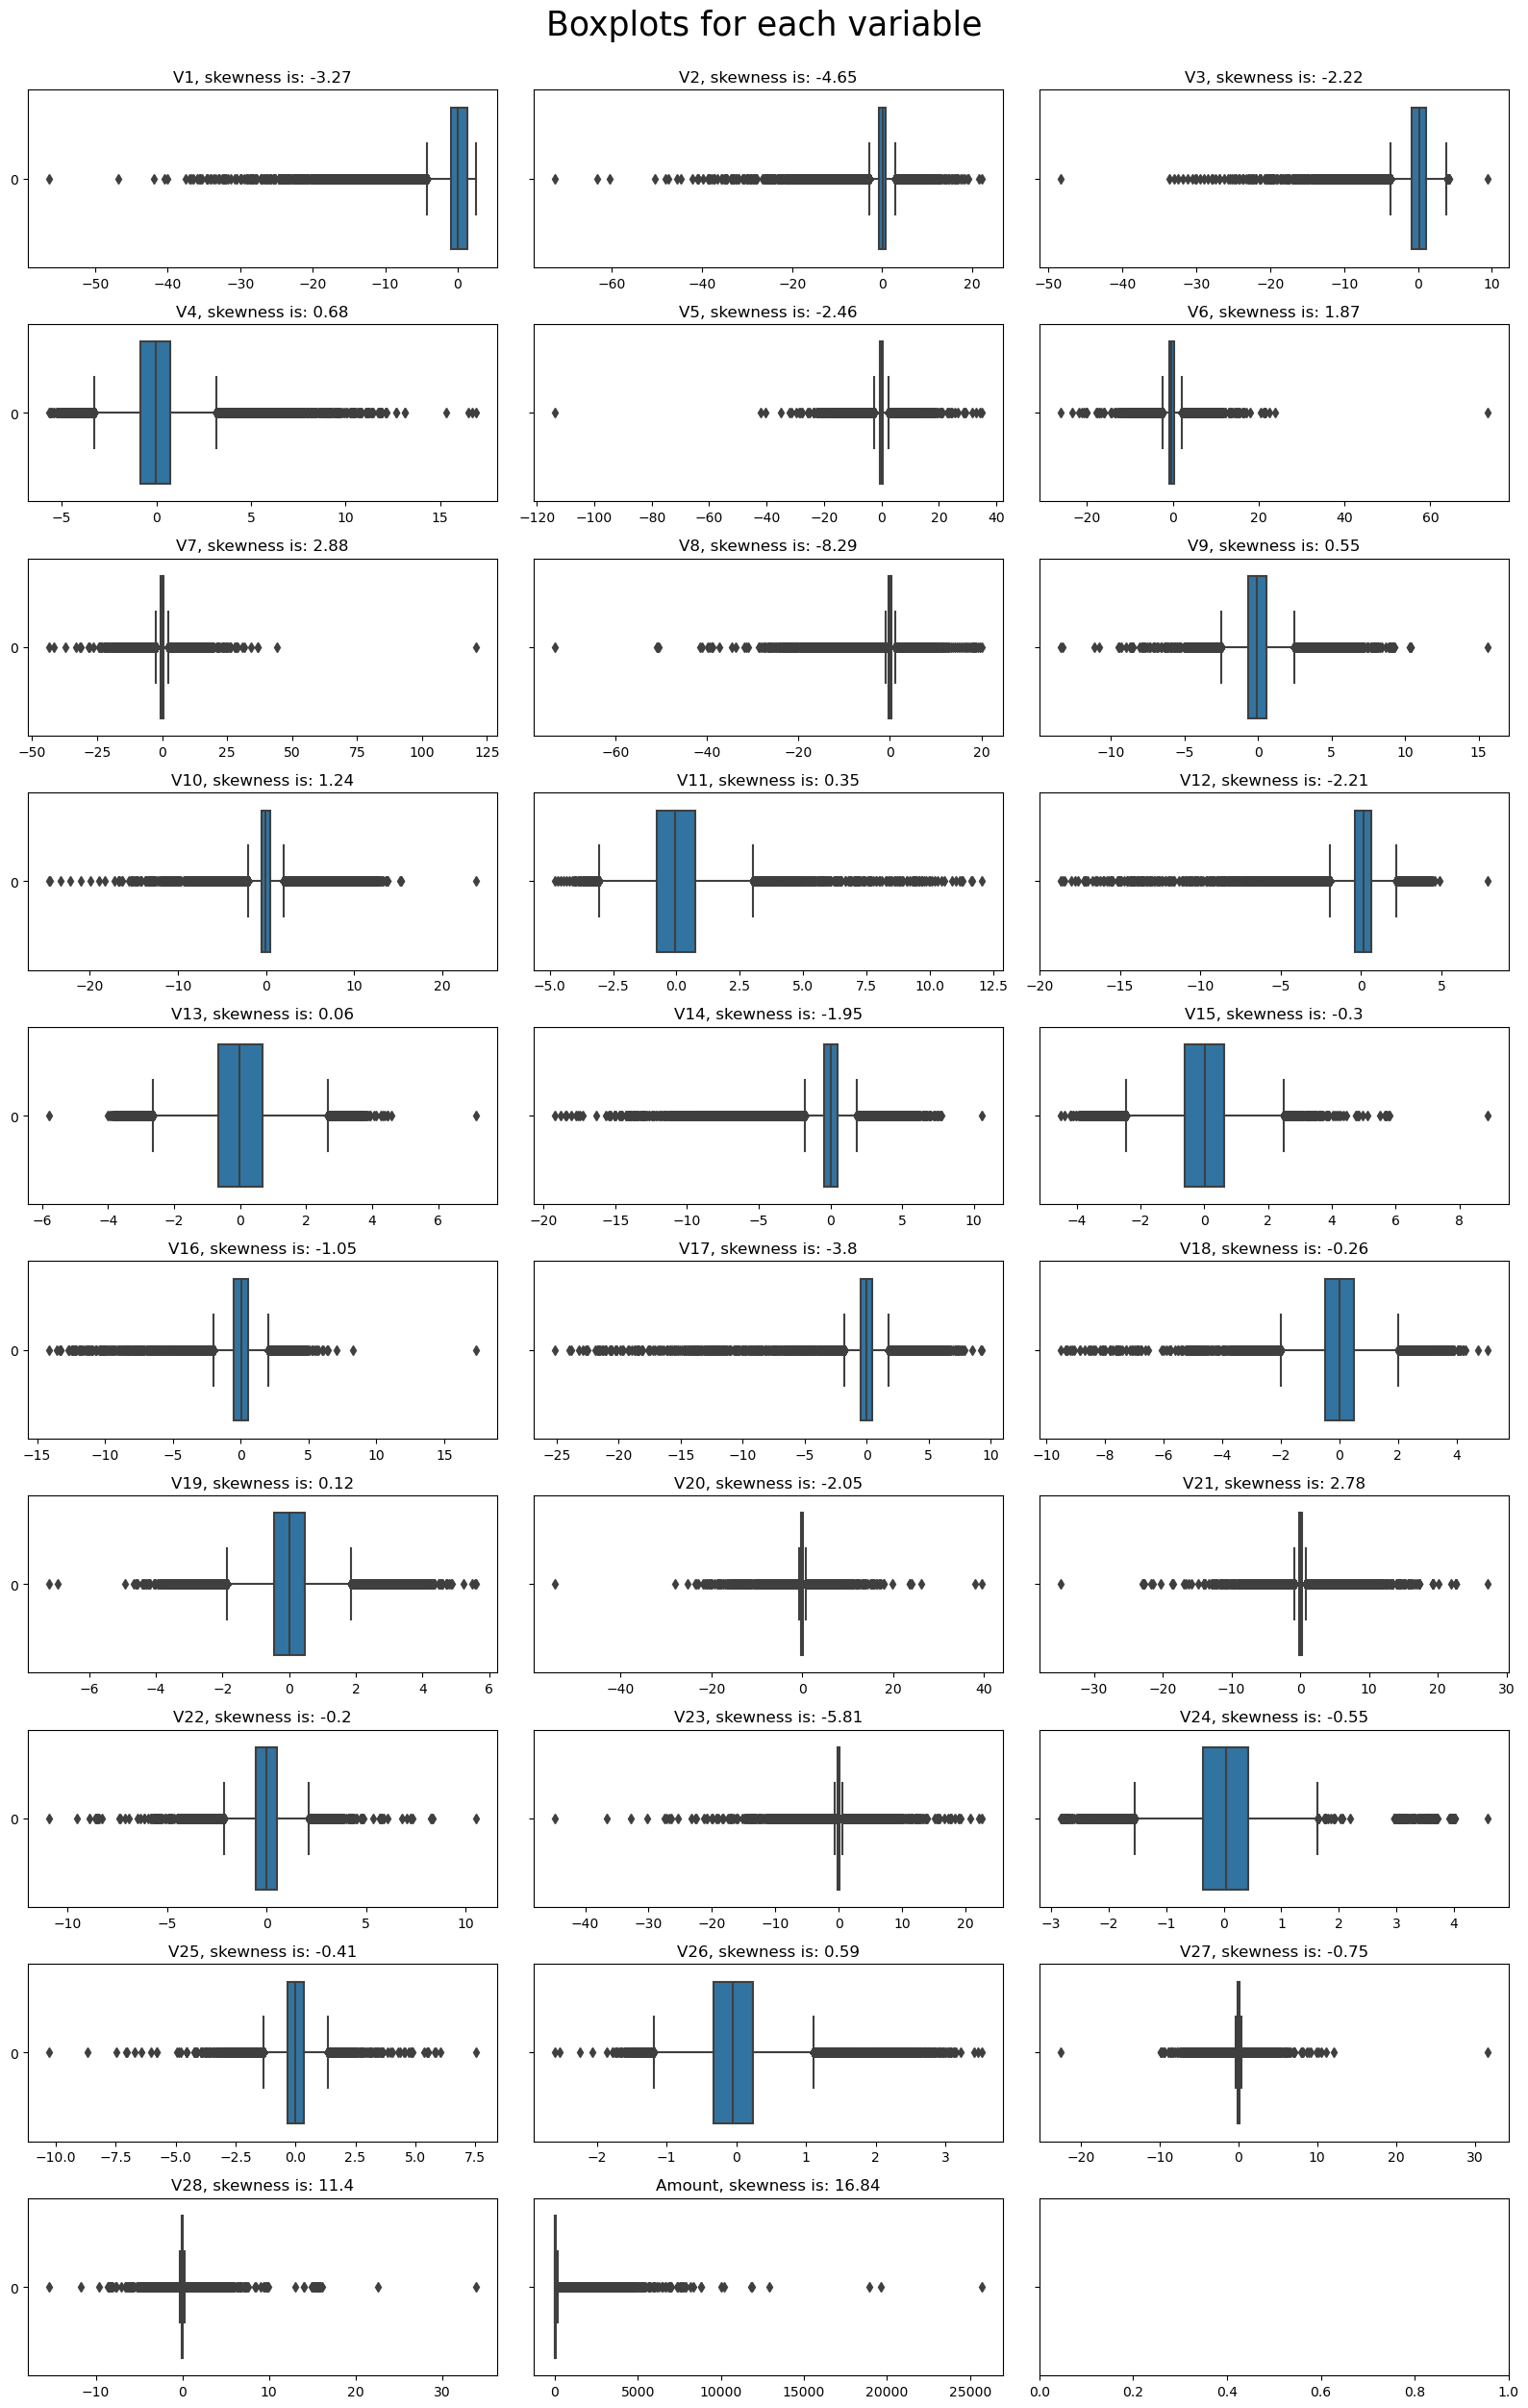

In [50]:
def boxplots_custom(dataset, columns_list, rows , cols ,suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

We can see that the variables V14, V15, V20, and V28 have outliers.

#### Now we will find the Inter Quartile Range (IQR) 

We have many problems with the data

1. Very high number of outliers
2. Highly skewed data

IQR : The interquartile range (IQR) is a measure of how spread out the middle 50% of a data set is. It is calculated by taking the difference between the third quartile (Q3) and the first quartile (Q1).

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [51]:
def IQR_method (df,n,features):
    
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        #  expression selects all rows in the DataFrame where the value in the current column is less than
        #  Q1 - outlier_step or greater than Q3 + outlier_step. The index property of the DataFrame returns 
        #  a list of the indices of the selected rows.

        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [52]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 30664


We have dropped all the outliers in the dataset now we will look at numbes of each category

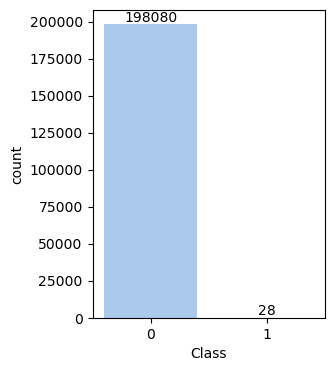

In [53]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

#### Now we are down to 28 fraud transction in the entire dataframe

#### Train Test Split

Before Splitting data we know that, we have only 28 cases in fraud section so if we split the dataset in normal way it my lead the model to overfit and may give inaccurate outcomes.

To prevent this we are going to use:
#### Stratified splitting

The main difference between normal splitting and stratified splitting is that stratified splitting ensures that the distribution of the target variable is the same in both the training set and the test set. This helps to prevent the model from overfitting the training set.

In [54]:
X = df.drop('Class', axis=1)
y = df['Class']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

##### Well we  have done the splitting of data , but should we do over/under sample before or after the splitting ?

The most important rule is  **never mess up with your test set**.

So, Always split into test and train sets BEFORE trying oversampling/undersampling techniques!

In [56]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [57]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

##### Well a machine learning model can work well on prediting the values based on training data , But it is called a good model only when it can predict well on unseen data

### Cross Validation

Cross-validation is a method for evaluating machine learning models on a limited data sample. It works by dividing the data sample into k groups, called folds. The model is then trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold being used as a test set once. The cross-validation score is calculated by averaging the performance of the model on the test sets.

The purpose of cross–validation is to test the ability of a machine learning model to predict new data.

### Stratified K-Fold CV (Cross-Validation)

Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.

### Over/undersample and Cross Validation

If you want to undersample or oversample your data you shouldn't do it before cross validating because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

Exactly like we should do feature selection inside the cross validation loop, we should also oversample inside the loop.

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)

#### Optimizing for recall

Recall is a measure of how many relevant cases a model can find. It is calculated by dividing the number of true positives by the sum of the number of true positives and the number of false negatives.


In the case of credit card fraud detection, we want to avoid false negatives as much as possible. This is because fraud transactions can cost us a lot of money. A false negative means that a fraud transaction is classified as a genuine transaction, which can lead to financial losses.

In [60]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.78787879 0.78787879 0.83333333 0.73134328 0.72727273]
Average Cross Validation Recall score: 0.7735413839891452


### Hyperparameter Tuning Using GridSearchCV

Hyperparameters are the parameters of a machine learning model that are not learned from the data. They are set before the model is trained.

GridSearchCV is a method for tuning the hyperparameters of a machine learning model. It works by evaluating the model with different hyperparameter settings and selecting the setting that results in the best performance

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

### Hyperparameter Tuning Using GridSearchCV


Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are the parameters that control the learning process, but they are not learned from the data.


Grid search CV (or Grid Search Cross-Validation) is a technique used in machine learning to find the optimal combination of hyperparameters for a given model. It works by exhaustively searching a grid of hyperparameter values, evaluating each combination on a hold-out set of data, and selecting the combination that performs best.

In [62]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

In [63]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 50, 'random_state': 13}
Best score: 0.7795567616463138


We have about 77% Recall on one of our models before oversampling. Let's check the test set scores.

In [64]:
y_pred = grid_rf.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[82547    10]
 [   39   103]]


In [66]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.725352,0.911504,0.807843,0.999407


###  Random Resampling Imbalanced Datasets


Random resampling of datasets is a technique used to address the problem of class imbalance in machine learning. Class imbalance occurs when there are a significantly different number of observations in each class. This can lead to machine learning models that are biased towards the majority class.

The main approches of random resampleing are:

1. Random oversampling: This technique involves duplicating observations from the minority class. This can be done by randomly sampling observations from the minority class and adding them to the training dataset.

2. Random undersampling: This technique involves removing observations from the majority class. This can be done by randomly sampling observations from the majority class and removing them from the training dataset.

3. SMOTE: This technique is a more sophisticated oversampling technique that generates synthetic observations from the minority class. This is done by identifying the k-nearest neighbors of each observation in the minority class and then creating new observations that are located between the original observation and its k-nearest neighbors.

4. TomekLinks: Tomek links are a type of undersampling technique used to address the problem of class imbalance in machine learning,Tomek links works by identifying and removing observations from the majority class that are closest to the minority class. These observations are called Tomek links. The intuition behind Tomek links is that these observations are likely to be misclassified by the machine learning model, and removing them can help to improve the model's performance on the minority class.

#### Important

Change to the class distribution should be only applied to the **training dataset**. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

### 1. Random Oversampling Imbalanced Datasets

In [68]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [69]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [70]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [71]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 192633 / 50.0 % of the dataset
Frauds: 192633 / 50.0 % of the dataset


## Imbalanced-Learn Pipeline


Imbalanced learn pipeline is a machine learning library in Python that provides tools for addressing the problem of class imbalance. It offers a variety of techniques for resampling datasets, as well as algorithms for training machine learning models on imbalanced datasets.

### Training model


In [72]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))


In [73]:
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.77272727 0.78787879 0.8030303  0.74626866 0.71212121]
Average Cross Validation Recall score: 0.7644052464947986


### Grid Search Cv

In [74]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_over_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [75]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.8640886476707372


### Confusion matrix and scores

In [76]:
y_pred = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[82180   377]
 [   20   122]]


In [78]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.859155,0.244489,0.380655,0.995199


#### Now we have our results for Over sampleing ,we are going to check for the undersampleing as well.

### 2. Random Undersampling Imbalanced Datasets

In [79]:
from imblearn.under_sampling import RandomUnderSampler
# define undersampling strategy
rus = RandomUnderSampler(random_state=42)

In [80]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [81]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


With our dataset after undersampling we have only 662 record so it's not the best idea to take advantage of that technique.

### 3. SMOTE(Synthetic Minority OverSampleing Technique)

***Training Model***

In [82]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [83]:
score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.77272727 0.83333333 0.81818182 0.7761194  0.72727273]
Average Cross Validation Recall score: 0.7855269109000453


#### Grid Search Cv

In [84]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [85]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.8671189507010402


#### Confusion matrix and scores

In [86]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [87]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[82181   376]
 [   20   122]]


In [88]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.859155,0.24498,0.38125,0.995212


### 4. Tomek Links

In [89]:
from imblearn.under_sampling import TomekLinks

tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

In [90]:
print('Genuine:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Frauds:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

Genuine: 192607 / 99.83 % of the dataset
Frauds: 331 / 0.17 % of the dataset


Until now we have done smpling over smote and tomek individually now we are going to ***combine*** these two techniques

### SMOTE+Tomek

The combination of SMOTE and Tomek links can be used to improve the performance of machine learning models on imbalanced datasets. SMOTE can help to improve the performance of machine learning models on the minority class, while Tomek links can help to improve the performance of machine learning models on the majority class

The process of SMOTE-Tomek Links is as follows.

1. Start of SMOTE: choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met (End of SMOTE).
5. Start of Tomek Links: choose random data from the majority class.
6. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

#### Training model

In [91]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=100, random_state=13))


In [92]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

#### Grid search cv 

grid search cv for smote +tomek is computationall demanding and may take up hours of time so w are not doing it here but i wil mention the code jut so if yu have a pc with high computation power you can run it
-->
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
SMOTETomek_rf = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
SMOTETomek_rf.fit(X_train, y_train)

#### Confusion matrix

In [93]:
y_pred = SMOTETomek_rf.predict(X_test)

In [94]:
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[82538    19]
 [   30   112]]


In [95]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.788732,0.854962,0.820513,0.999407


### Performance comparision

In [96]:
predictions = pd.concat([rf_score, over_rf_score, smote_rf_score, SMOTETomek_rf_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,Random Forest with,Recall,Precision,F1 Score,Accuracy
1,Random Oversampling,0.859155,0.244489,0.380655,0.995199
2,SMOTE Oversampling,0.859155,0.244980,0.381250,0.995212
3,SMOTE + Tomek,0.788732,0.854962,0.820513,0.999407
0,No Under/Oversampling,0.725352,0.911504,0.807843,0.999407


### Summary

As we cam see that both SMOTE and randome oversampleing giving high recall but in other parameters SMOTE performes Slightly better so we can use any one of those